###Perceptron
it is a simplest form a neural network with a single neuron capable of linear predictions and it does not require a activation function or we do neet feed the activation function beacause of its smaller size.

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import torch


In [7]:
dataset = np.genfromtxt("p2data.txt",delimiter='\t')
X,y = dataset[:,:2],dataset[:,2]
y = y.astype(np.int64)
print('class label counts:',np.bincount(y))
print('X.shape:',X.shape)
print('y.shape:',y.shape)



class label counts: [50 50]
X.shape: (100, 2)
y.shape: (100,)


Shuffling and splitting the data into 70 :30 split as we have 100 rows of data


In [8]:
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X,y = X[shuffle_idx],y[shuffle_idx]
X_train,X_test = X[shuffle_idx[:70]],X[shuffle_idx[70:]]
y_train,y_test = y[shuffle_idx[:70]],y[shuffle_idx[70:]]

In [9]:
mu,sigma = X_train.mean(axis = 0),X_train.std(axis=0)
X_train = (X_train-mu)/sigma
X_test = (X_test-mu)/sigma
X_train,X_test

(array([[ 1.37001499,  0.89400639],
        [-1.47257051, -0.30436276],
        [ 1.78644472,  1.28241061],
        [ 0.75442323,  0.49612888],
        [-0.70760722, -1.02433157],
        [ 0.21125402, -1.03854148],
        [ 0.3832576 , -0.63592734],
        [-1.29604052, -2.21322744],
        [ 0.6503158 ,  1.17346797],
        [ 0.740844  ,  1.72765449],
        [-1.13761617, -1.14274749],
        [-2.35069406, -0.46540841],
        [ 1.07579834,  1.48134937],
        [-0.63518466, -0.65013725],
        [-1.25077642, -2.04744514],
        [-0.48128671, -1.35589615],
        [ 0.44210094,  0.87505984],
        [ 0.62768375,  0.7803271 ],
        [-1.16024822, -1.13801085],
        [-0.73023927,  0.28298022],
        [ 0.47378581,  1.17346797],
        [ 0.9219004 ,  0.29719013],
        [ 0.90832117,  1.66134157],
        [-0.44054902, -1.91955595],
        [ 0.78158169,  0.2024574 ],
        [-0.62160543, -1.16643068],
        [ 0.71368554,  1.76554758],
        [-0.79813542, -0.631

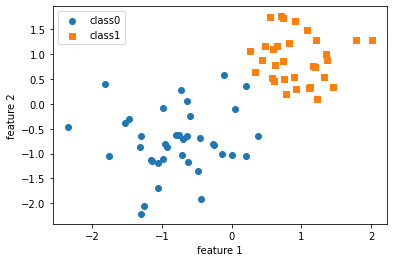

In [10]:
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],label = 'class0',marker='o')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],label = 'class1',marker='s')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()


In [22]:
# from torch.cuda import device_of
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# def custom_where(cond,x_1,x_2):
#   return (cond*x_1)+((1-cond)*x_2)


# class Perceptron():
#   def __init__(self,num_features):
#     self.num_features = num_features
#     self.weights = torch.zeros(num_features,1,dtype = torch.float32,device=device)
#     self.bias = torch.zeros(1,dtype = torch.float32,device = device)
#   def forward(self,x):
#     linear = torch.add(torch.mm(x,self.weights),self.bias)
#     predictions = custom_where(linear>0.,1,0).float()
#     return predictions
#   def backward(self,x,y):
#     predictions = self.forward(x)
#     errors = y - predictions
#     return errors
#   def train(self,x,y,epochs):
#     for e in range(epochs):
#       for i in range(y.size()[0]):
#         errors = self.backward(x[i].view(1,self.num_features),y[i]).view(-1)
#         self.weights +=(errors* x[i]).view(self.num_features,1)
#         self.bias +=errors
#   def evaluate(self,x,y):
#     predictions = self.forward(x).view(-1)
#     accuracy = torch.sum(predictions==y).float()/y.size()[0]
#     return accuracy
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


def custom_where(cond, x_1, x_2):
    return (cond * x_1) + (~(cond) * x_2)


class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, 1, 
                                   dtype=torch.float32, device=device)
        self.bias = torch.zeros(1, dtype=torch.float32, device=device)

    def forward(self, x):
        linear = torch.add(torch.mm(x, self.weights), self.bias)
        predictions = custom_where(linear > 0., 1, 0).float()
        return predictions
        
    def backward(self, x, y):  
        predictions = self.forward(x)
        errors = y - predictions
        return errors
        
    def train(self, x, y, epochs):
        for e in range(epochs):
            
            for i in range(y.size()[0]):
                # use view because backward expects a matrix (i.e., 2D tensor)
                errors = self.backward(x[i].view(1, self.num_features), y[i]).view(-1)
                self.weights += (errors * x[i]).view(self.num_features, 1)
                self.bias += errors
                
    def evaluate(self, x, y):
        predictions = self.forward(x).view(-1)
        accuracy = torch.sum(predictions == y).float() / y.size()[0]
        return accuracy


In [23]:
ppn = Perceptron(num_features=2)
X_train_tensor = torch.tensor(X_train,dtype = torch.float32,device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32,device=device)

ppn.train(X_train_tensor,y_train_tensor,epochs=5)

print('Model parameters:')
print(' Weights: %s' % ppn.weights)
print(' Bias %s'% ppn.bias)

Model parameters:
 Weights: tensor([[1.2734],
        [1.3464]])
 Bias tensor([-1.])


Evaluating the model
  

In [26]:
X_test_tensor = torch.tensor(X_test,dtype = torch.float32,device=device)
y_test_tensor = torch.tensor(y_test,dtype=torch.float32,device=device)

test_acc = ppn.evaluate(X_test_tensor,y_test_tensor)
print('Test set accuracy %.2f%%' % (test_acc*100))

Test set accuracy 93.33%


/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


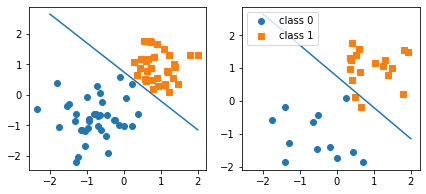

In [27]:
w,b = ppn.weights,ppn.bias
x_min = -2
y_min =((-(w[0]*x_min)-b[0])/w[1])
x_max=2
y_max = ((-(w[0]*x_max)-b[0])/w[1])  
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()